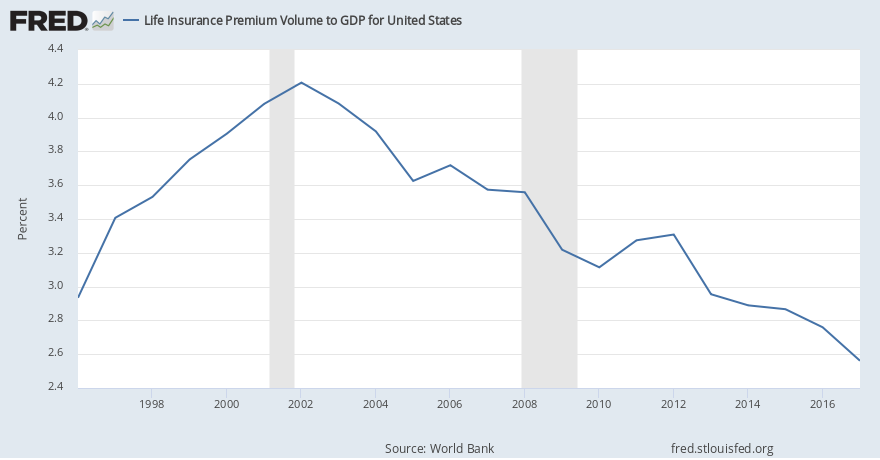

## Objective
This project was brought about as a study in Predictive Analytics. The St. Louis Federal Reserve data 
showed a possible predictive link between the economic Gross Domestic Product (GDP) and the premiums paid in the insurance industry.  

The objective of this project is to examine how well the model prediction, from certain features, help
insurance companies make decisions on their premium policies.


## Data

The - insurance.csv - data set contains 1338 observations (rows) and 7 features (columns). It can be found on Kaggle:

https://www.kaggle.com/noordeen/insurance-premium-prediction


## Features

The dataset contains the following numerical and categorical features:

   * age 
   * bmi
   * children 
   * expenses 
   * sex
   * smoker 
   * region 

that were converted into factors with numerical value.


## Evaluation
The evaluation criteria is the Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

## Import Libraries

In [1]:
#main library
import pandas as pd
import numpy as np

#data extraction, model tuning, and imputing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer

# preprocessing library
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# model library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# evaluation metric
from sklearn.metrics import r2_score

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# suppress system warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")



## Import data

In [2]:
#import data
data_path = '../input/insurance-premium-prediction/insurance.csv'
data = pd.read_csv(data_path)


In [3]:
#make a copy of the data for data exploration
df = data.copy()

## Exploratory Data Analysis (EDA)

In [4]:
#see the first 15 lines of data
print(data.head(15))


    age     sex   bmi  children smoker     region  expenses
0    19  female  27.9         0    yes  southwest  16884.92
1    18    male  33.8         1     no  southeast   1725.55
2    28    male  33.0         3     no  southeast   4449.46
3    33    male  22.7         0     no  northwest  21984.47
4    32    male  28.9         0     no  northwest   3866.86
5    31  female  25.7         0     no  southeast   3756.62
6    46  female  33.4         1     no  southeast   8240.59
7    37  female  27.7         3     no  northwest   7281.51
8    37    male  29.8         2     no  northeast   6406.41
9    60  female  25.8         0     no  northwest  28923.14
10   25    male  26.2         0     no  northeast   2721.32
11   62  female  26.3         0    yes  southeast  27808.73
12   23    male  34.4         0     no  southwest   1826.84
13   56  female  39.8         0     no  southeast  11090.72
14   27    male  42.1         0    yes  southeast  39611.76


In [5]:
data.shape

(1338, 7)

In [6]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


## Data Visualization

Identify clusters, outliers, and possible correlations between features or variables.

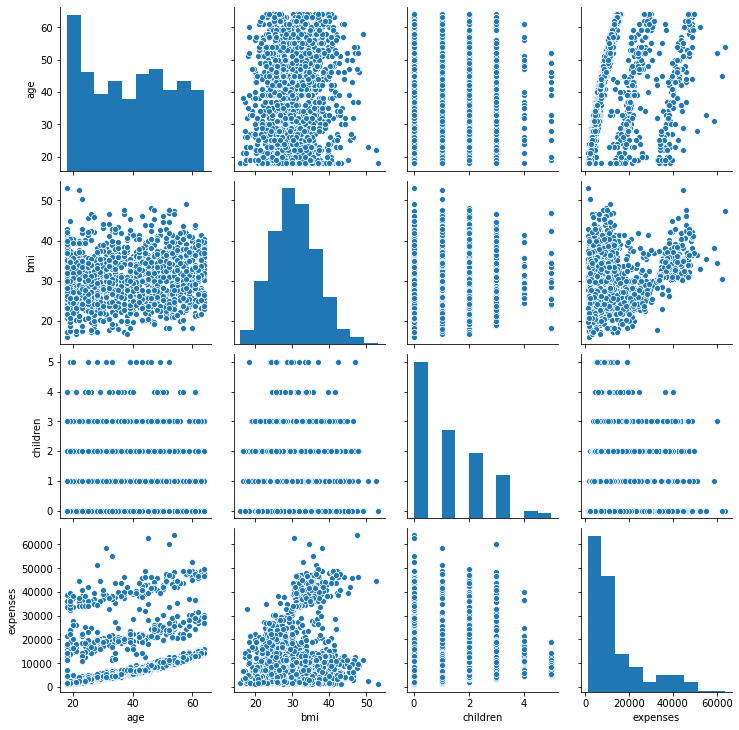

In [10]:
sns.pairplot(df);

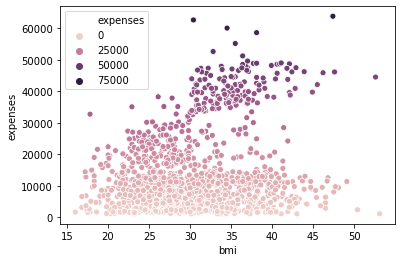

In [11]:
sns.scatterplot(x='bmi', y='expenses', data=df, hue='expenses');

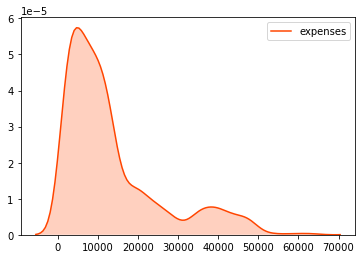

In [12]:
sns.kdeplot(df['expenses'], shade=True, color='orangered');

detect any outliers.

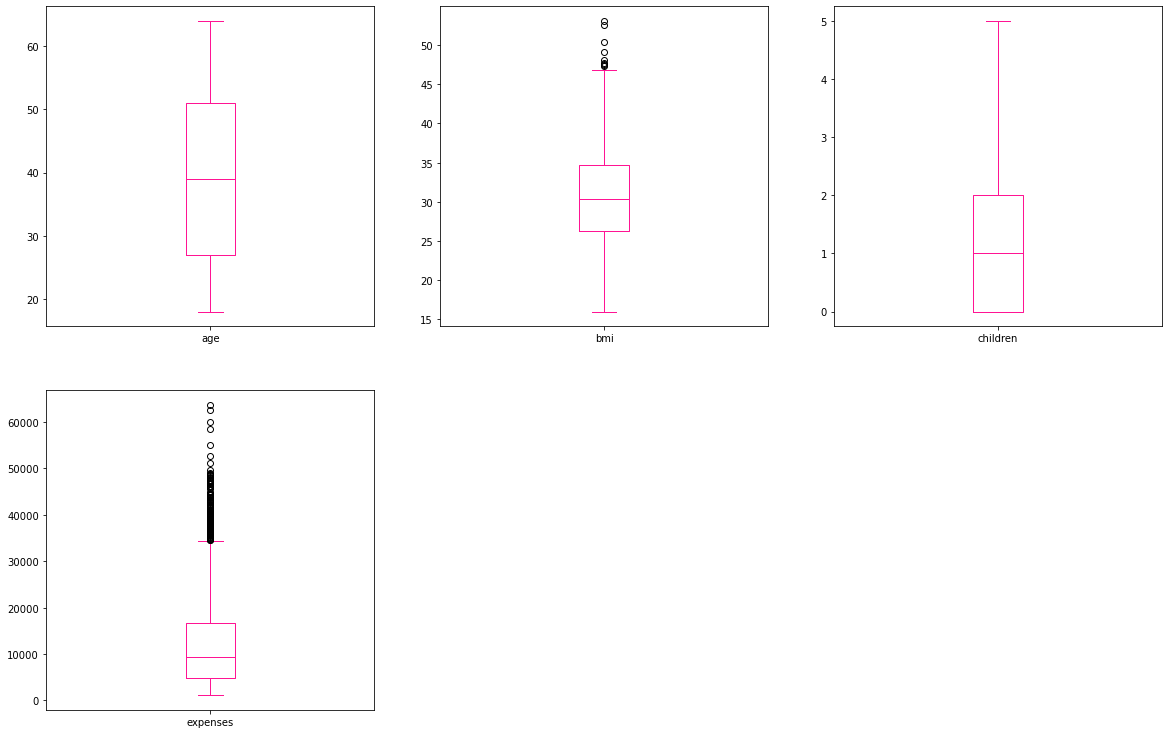

In [13]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20), color='deeppink');

analyze any skewness.

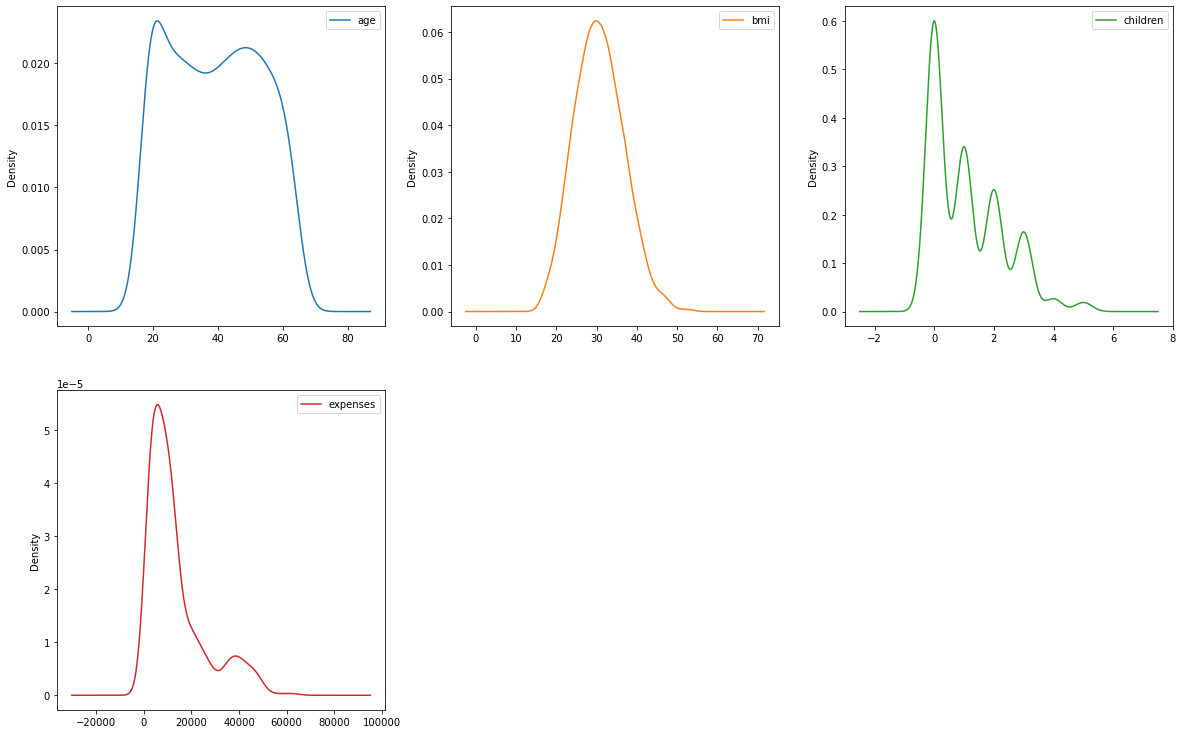

In [14]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20,20));

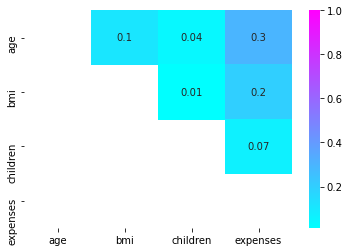

In [15]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap='cool', mask=mask);

## Data Preprocessing

### Handle missing values

In [16]:
#check how many values are missing (NaN) before we apply the methods below 
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


### Convert categorial data into numerical data

In [17]:
#option0: 
#pandas factorizing: maps each category to a different integer = label encoder 

#create series for pandas
region = data["region"] # series 
region_encoded, region_categories = pd.factorize(region)
factor_region_mapping = dict(zip(region_categories, region_encoded)) #mapping of encoded numbers and original categories. 

print("Pandas factorize function for label encoding with series")  
print(region[:10]) #original version 
print(region_categories) #list of categories
print(region_encoded[:10]) #encoded numbers for categories 
print(factor_region_mapping) # print factor mapping

Pandas factorize function for label encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')
[0 1 1 2 2 1 1 2 3 2]
{'southwest': 0, 'southeast': 1, 'northwest': 1, 'northeast': 2}


In [18]:
#option1: 
#pandas get_dummies: maps each category to 0 (cold) or 1 (hot) = one hot encoder 

#create series for pandas
region = data["region"] # series 
region_encoded = pd.get_dummies(region, prefix='')

print("Pandas get_dummies function for one hot encoding with series")  

print(region[:10]) #original version 
print(region_encoded[:10]) #encoded numbers for categories 

Pandas get_dummies function for one hot encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
   _northeast  _northwest  _southeast  _southwest
0           0           0           0           1
1           0           0           1           0
2           0           0           1           0
3           0           1           0           0
4           0           1           0           0
5           0           0           1           0
6           0           0           1           0
7           0           1           0           0
8           1           0           0           0
9           0           1           0           0


In [19]:
#option2: 
#sklearn label encoding: maps each category to a different integer

#create ndarray for label encoding (sklearn)
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

#label encoder = le

## le for sex
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")  
print(le_sex_mapping)
print(sex[:10])

## le for smoker
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")  
print(le_smoker_mapping)
print(smoker[:10])

Sklearn label encoder results for sex:
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0
Sklearn label encoder results for smoker:
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [20]:
#option3: 
#sklearn one hot encoding: maps each category to 0 (cold) or 1 (hot) 
#one hot encoder = ohe

#create ndarray for one hot encodoing (sklearn)
region = data.iloc[:,5:6].values #ndarray

## ohe for region
ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])


Sklearn one hot encoder results for region:
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


## Create train and test data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
#putting the data together:

##take the numerical data from the original data
X_numeric = data[['age', 'bmi', 'children']].copy()

##take the encoded data and add to numerical data
X_final = pd.concat([X_numeric, region, sex, smoker], axis = 1)

#define y as being the "charges column" from the original dataset
y_final = data[['expenses']].copy()

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

## Feature Scaling

In [23]:
##normalized scaler (fit transform on train, fit only on test)
n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test= n_scaler.transform(X_test.astype(np.float))


#standard scaler (fit transform on train, fit only on test)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))


## Modeling

### LinearRegression

In [24]:
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))


lr.coef_: [[3590.94405133 2090.38970562  569.20738738  254.60411259   18.32133515
  -175.03113433  -84.59111911  -23.83985769 9426.18975574]]
lr.intercept_: [13232.91666667]
lr train score 0.731, lr test score: 0.791


### PolynomialRegression

In [25]:
poly = PolynomialFeatures (degree = 3)
X_poly = poly.fit_transform(X_final)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y_final, test_size = 0.30, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

#print score
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))


poly train score 0.847, poly test score: 0.858


### SupportVectorRegression

In [26]:
svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score 0.640, svr test score: 0.688


### DecisionTreeRegressor

In [27]:
dt = DecisionTreeRegressor(random_state=0)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))


#fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

dt train score 0.999, dt test score: 0.726


### RandomForestRegression

In [28]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.975, forest test score: 0.856


## Comparing the best models and hyperparameter tuning

In [29]:
#Function to print best hyperparamaters: 
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

### SupportVectorRegression Hyperparameter Tuning: best parameters

In [30]:
param_grid_svr = dict(kernel=[ 'linear', 'poly'],
                     degree=[2],
                     C=[600, 700, 800, 900],
                     epsilon=[0.0001, 0.00001, 0.000001])
svr = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, verbose=3)

In [31]:
#fit model
svr = svr.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.600, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.591, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.572, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.550, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.566, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.474, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.344, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.287, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.389, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.225, total=   0.0s
[CV] C=600, degre

[CV]  C=700, degree=2, epsilon=1e-06, kernel=poly, score=0.256, total=   0.0s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.600, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.586, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.626, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.542, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.623, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=poly, score=0.551, total=   0.0s
[CV] C=800, 

[CV]  C=900, degree=2, epsilon=1e-06, kernel=linear, score=0.623, total=   3.4s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.575, total=   0.0s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.389, total=   0.1s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.364, total=   0.0s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.483, total=   0.1s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.294, total=   0.1s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   16.7s finished


In [32]:
#print(svr.best_estimator_.get_params())
print_best_params(svr)



*** SVR Best Parameters ***
C: 900
cache_size: 200
coef0: 0.0
degree: 2
epsilon: 1e-06
gamma: scale
kernel: linear
max_iter: -1
shrinking: True
tol: 0.001
verbose: False



In [33]:
#print score
print('\n\nsvr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))



svr train score 0.685, svr test score: 0.767


### DecisionTree Hyperparameter tuning: best parameters

In [34]:
param_grid_dt = dict(min_samples_leaf=np.arange(9, 13, 1, int), 
                  max_depth = np.arange(4,7,1, int),
                  min_impurity_decrease = [0, 1, 2],
                 )

dt = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid_dt, cv=5,  verbose=3)

In [35]:
#fit model
dt = dt.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.864, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.814, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.830, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.833, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.806, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=11, score=0.814, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=11, score=0.830, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=11, score=0.844, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=11, score=0.806, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=12 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=12, score=0.863, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=12 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=12, score=0.817, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=12 .......
[CV]  max_depth=4, min

[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=10, score=0.869, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=10, score=0.804, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=10, score=0.830, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=10, score=0.840, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=10, score=0.799, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=11, score=0.868, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=5, min

[CV]  max_depth=5, min_impurity_decrease=2, min_samples_leaf=12, score=0.844, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=2, min_samples_leaf=12 .......
[CV]  max_depth=5, min_impurity_decrease=2, min_samples_leaf=12, score=0.800, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=9, score=0.872, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=9, score=0.803, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=9, score=0.825, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=9, score=0.827, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=6, min_imp

[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=11, score=0.869, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=11 .......
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=11, score=0.807, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=11 .......
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=11, score=0.818, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=11 .......
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=11, score=0.837, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=11 .......
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=11, score=0.796, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=12 .......
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=12, score=0.867, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=12 .......
[CV]  max_depth=6, min

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.7s finished


In [36]:
print_best_params(dt)


*** DecisionTreeRegressor Best Parameters ***
ccp_alpha: 0.0
criterion: mse
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0
min_impurity_split: None
min_samples_leaf: 12
min_samples_split: 2
min_weight_fraction_leaf: 0.0
presort: deprecated
random_state: 0
splitter: best



In [37]:
#print score
print('\n\ndt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))




dt train score 0.853, dt test score: 0.886


### Random Forest hyperparameter tuning: best parameters

In [38]:
param_grid_rf = dict(n_estimators=[20],
                     max_depth=np.arange(1, 13, 2),
                     min_samples_split=[2],
                     min_samples_leaf= np.arange(1, 15, 2, int),
                     bootstrap=[True, False],
                     oob_score=[False, ])


forest = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid_rf, cv=5, verbose=3)

In [39]:
#fit model
forest.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.648, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.486, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.613, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.586, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.593, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.648, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.834, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.846, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.806, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.875, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.819, total=   0.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.836, total=   0.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.831, total=   0.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.797, total=   0.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.875, total=   0.1s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.798, total=   0.1s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.831, total=   0.1s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.815, total=   0.1s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.785, total=   0.1s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.817, total=   0.1s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.797, total=   0.1s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.763, total=   0.1s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.809, total=   0.1s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.788, total=   0.1s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.765, total=   0.1s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.875, total=   0.1s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.593, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.649, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.487, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.613, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.862, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.812, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.825, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.830, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.874, total=   0.1s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.795, total=   0.0s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.833, total=   0.0s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.826, total=   0.1s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.860, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.780, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.801, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.785, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=False, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.753, total=   0.1s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.770, total=   0.1s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.785, total=   0.1s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.768, total=   0.1s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.832, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.754, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.776, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.782, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:   22.5s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11]),
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'min_samples_split': [2], 'n_estimators': [20],
                         'oob_score': [False]},
             verbose=3)

In [40]:
print_best_params(forest)


*** RandomForestRegressor Best Parameters ***
bootstrap: True
ccp_alpha: 0.0
criterion: mse
max_depth: 5
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 9
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 20
n_jobs: None
oob_score: False
random_state: 0
verbose: 0
warm_start: False



In [41]:
#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))



forest train score 0.869, forest test score: 0.891
